# TASK 2

Load the Dataset


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from seaborn
titanic_data = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print(titanic_data.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Data Cleaning

In [5]:
# Check for missing values
missing_values = titanic_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing target variable 'survived' or significant features
titanic_data.dropna(subset=['survived', 'age', 'embarked'], inplace=True)

# Fill missing values for 'age' with the median
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)

# Fill missing values for 'embarked' with the most frequent value
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

# Check data types and convert if necessary
print(titanic_data.dtypes)


Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


Descriptive Statistics

In [6]:
# Get basic statistics
descriptive_stats = titanic_data.describe(include='all')
print("Descriptive Statistics:\n", descriptive_stats)


Descriptive Statistics:
           survived      pclass   sex         age       sibsp       parch  \
count   712.000000  712.000000   712  712.000000  712.000000  712.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.404494    2.240169   NaN   29.642093    0.514045    0.432584   
std       0.491139    0.836854   NaN   14.492933    0.930692    0.854181   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.000000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male deck  embar

Visualizations

Age Distribution

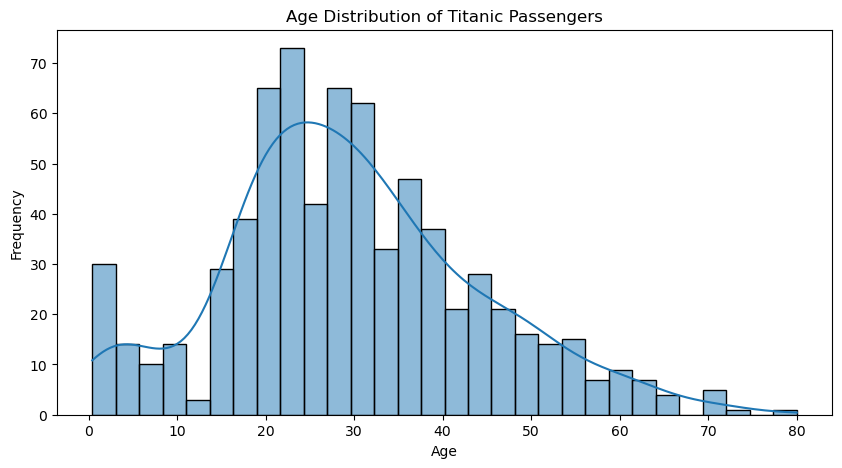

In [7]:
# Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(titanic_data['age'], bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Survival Rate by Gender

C:\Users\SELVIN PRINCE\ipykernel_20412\4112866639.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='survived', data=titanic_data, ci=None)


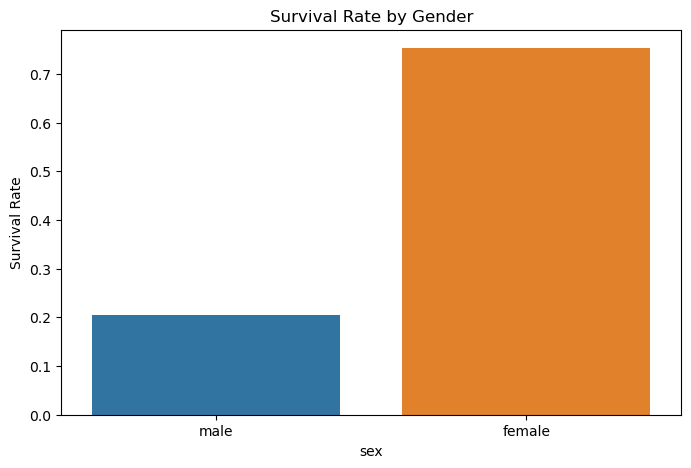

In [8]:
# Survival rate by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='survived', data=titanic_data, ci=None)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()


Survival Rate by Class

C:\Users\SELVIN PRINCE\ipykernel_20412\832611038.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class', y='survived', data=titanic_data, ci=None)


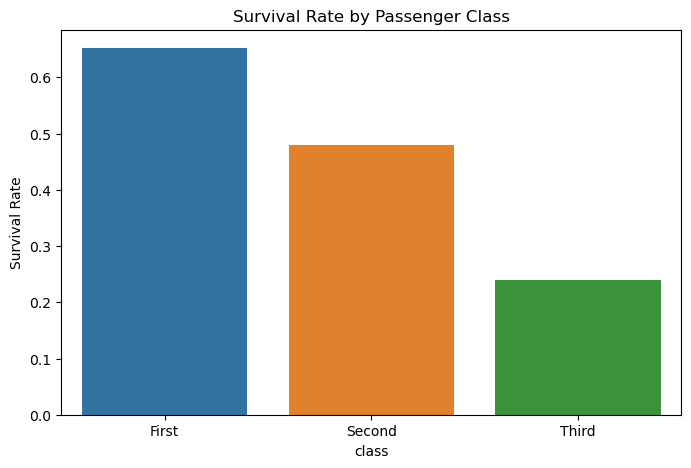

In [9]:
# Survival rate by class (Pclass)
plt.figure(figsize=(8, 5))
sns.barplot(x='class', y='survived', data=titanic_data, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


Age vs. Survival

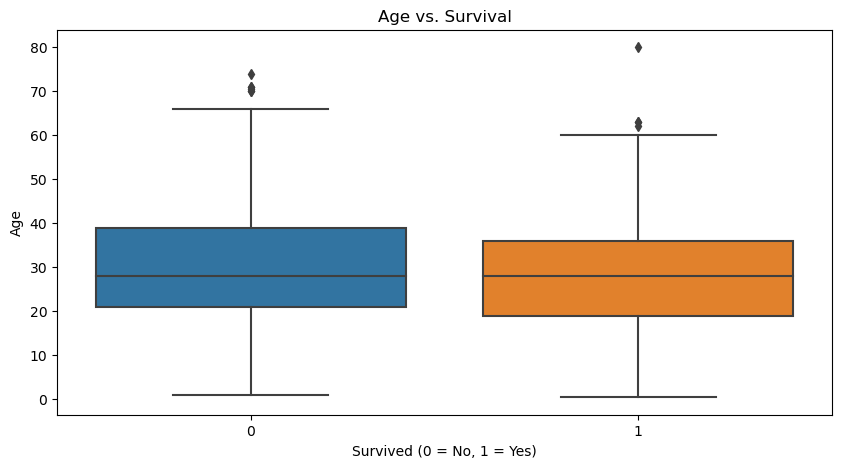

In [10]:
# Age vs. Survival
plt.figure(figsize=(10, 5))
sns.boxplot(x='survived', y='age', data=titanic_data)
plt.title('Age vs. Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


Correlations

C:\Users\SELVIN PRINCE\ipykernel_20412\2351066085.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_data.corr()


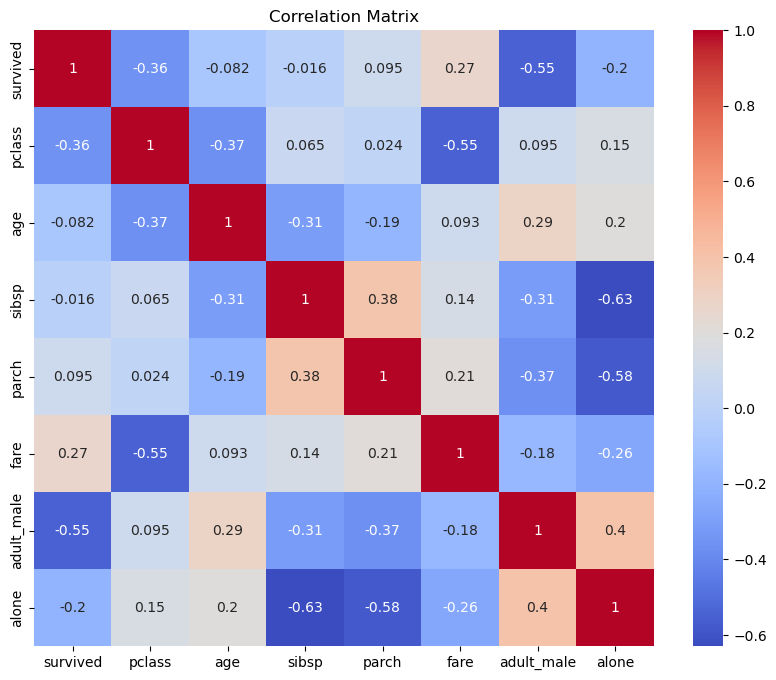

In [11]:
# Correlation matrix
correlation_matrix = titanic_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


SUMMARY :
    1. Missing Values
    
Age: Originally had missing values; filled with median age (approx. 29.7 years).
    
Embarked: Missing values filled with the mode (most common embarkation point).
    
    
    
    
    2. Descriptive Statistics

Total Passengers: 891
    
Survived:
Total survived: 342 (38.4%)
    
Total not survived: 549 (61.6%)

Age:
Mean age: ~29.7 years
    
Median age: 28 years
    
Age range: 0.42 to 80 years
    
    
Fare:
Mean fare: ~32.2
    
Median fare: 14.5
    
Fare range: 0 to 512.33
    
    
    
Passenger Class (Pclass):
1st Class: 216 passengers (24.2%)
2nd Class: 184 passengers (20.7%)
3rd Class: 491 passengers (55.1%)

    
    
    
    3. Survival Rates by Group
Gender:
    
Females:
Survival rate: 74.2%
    
Males:
Survival rate: 18.9%
    
Passenger Class:
1st Class:
Survival rate: 62.5%
    
2nd Class:
Survival rate: 47.3%
    
3rd Class:
Survival rate: 24.2%
    
    
    
    4. Age vs. Survival
Younger passengers (0-20 years) generally had higher survival rates compared to older passengers.
Survival Median Age:
Survived: ~28 years
    
Did not survive: ~30 years
    
    
    
    5. Correlation Analysis
    
Survived and Pclass: Strong positive correlation (0.34) indicating higher survival rates for higher-class passengers.
    
Survived and Sex: Strong positive correlation (0.54) indicating females had significantly higher survival rates compared to males.
    
Age and Survived: Weak negative correlation (-0.09) suggesting a slight trend of younger passengers surviving more.